# A look at the SanGIS/SANDAG data

In [1]:
# to create spatial data
import geopandas as gpd


In [2]:
# import the conserved lands data 

sd=gpd.read_file('../data/SANGIS/CONSERVED_LANDS.json')

This was the only dataset available on the SanGIS Data Warehouse. The CCED database can incorporate information from other sources as well, but I wanted to see if there was any similarity in this dataset as the entries in the CCED database that were "Unknown, SANDAG reported" and "Unknown, SanGIS reported"

In [3]:
sd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LandID      9412 non-null   int64   
 1   Jurisdicti  9412 non-null   object  
 2   GenOwn      9412 non-null   object  
 3   PropertyNa  9412 non-null   object  
 4   OwnName     9412 non-null   object  
 5   Status      9412 non-null   object  
 6   ConsDate    9412 non-null   object  
 7   ConsType    9412 non-null   object  
 8   PublicAcce  9412 non-null   object  
 9   MgtResp     9412 non-null   object  
 10  MgtAgency   9412 non-null   object  
 11  MgtPlan     9412 non-null   object  
 12  MgtPlanDat  9412 non-null   object  
 13  MgtPlanFun  9412 non-null   object  
 14  InfoSource  9412 non-null   object  
 15  ParcelID    9412 non-null   int64   
 16  APN8        9412 non-null   int64   
 17  Acres       9412 non-null   float64 
 18  Shape_STAr  9412 non-null   float64 
 19

In [84]:
sd.shape

(9370, 21)

In [4]:
sd.sample(20)

,LandID,Jurisdicti,GenOwn,PropertyNa,OwnName,Status,ConsDate,ConsType,PublicAcce,MgtResp,...,MgtPlan,MgtPlanDat,MgtPlanFun,InfoSource,ParcelID,APN8,Acres,Shape_STAr,Shape_STLe,geometry
2588,2539,Unincorporated,State,CUYAMACA RANCHO STATE PARK,CALIFORNIA DEPARTMENT OF PARKS AND RECREATION,Conserved,2004-11-29T00:00:00+00:00,Acquisition,Yes,STATE,...,UNKNOWN,1899-11-30T00:00:00+00:00,,CA Parks Shapefile,5039156,33507008,17.197117,7.491034e+05,3718.265955,"POLYGON ((6452165.262 1933625.921, 6451133.681..."
3521,3452,Unincorporated,Special District,ELFIN FOREST RECREATIONAL RESERVE,SAN DIEGO COUNTY WATER AUTHORITY,Conserved,1996-03-27T00:00:00+00:00,Acquisition,Yes,LOCAL,...,UNKNOWN,1899-11-30T00:00:00+00:00,,http://www.olivenhain.com/about-us/elfin-fores...,728667,23802010,31.078060,1.353755e+06,4705.079196,"POLYGON ((6290179.005 1973951.460, 6290183.000..."
9281,13152,Unincorporated,Non-Profit,EAGLE PEAK PRESERVE,SAN DIEGO RIVER PARK FOUNDATION,Conserved,2017-01-01T00:00:00+00:00,Acquisition,,,...,,1899-11-30T00:00:00+00:00,,Parcels layer 2018,675148,28935015,0.207055,9.019288e+03,423.708769,"POLYGON ((6427633.903 1960181.125, 6427633.000..."
6921,6750,Carlsbad,Private,PALOMAR OAKS BUSINESS CENTER,PALOMAR OAKS BUSINESS CENTER ASSOC,Conserved,2005-09-22T00:00:00+00:00,Easement,No,UNKNOWN,...,NO PLAN,1899-11-30T00:00:00+00:00,No,Carlsbad HMP,5030163,21309106,0.361944,1.576623e+04,742.433705,"POLYGON ((6243654.114 1988394.283, 6243594.170..."
8269,7981,Unincorporated,Non-Profit,CIELO PARCEL I,ESCONDIDO CREEK CONSERVANCY,Conserved,2018-04-06T00:00:00+00:00,Acquisition,,LOCAL,...,UNKNOWN,1899-11-30T00:00:00+00:00,,"Meeting 10/29/13, HT11",133,26441408,20.459755,8.912234e+05,4541.376576,"POLYGON ((6283785.000 1967356.000, 6285097.000..."
5570,5429,San Diego,City,SCRIPPS MIRAMAR OPEN SPACE,CITY OF SAN DIEGO,Conserved,1979-11-02T00:00:00+00:00,Easement,,LOCAL,...,UNKNOWN,1899-11-30T00:00:00+00:00,,City SD Dedicated Parcels 2013,8758,31904035,0.570143,2.483534e+04,1046.127722,"POLYGON ((6305689.500 1911819.875, 6305824.500..."
3516,3447,San Diego,State,DEL MAR MESA - LOPEZ RIDGE ECOLOGICAL RESERVE,CALIFORNIA DEPARTMENT OF FISH AND WILDLIFE,Conserved,2010-04-15T00:00:00+00:00,Acquisition,No,STATE,...,Yes,2008-04-26T00:00:00+00:00,,CDFW 2012 Property Shapefile,14460,30901004,1.782693,7.765379e+04,1706.501889,"MULTIPOLYGON (((6282202.500 1925152.875, 62821..."
2870,2821,Unincorporated,Joint,SAN DIEGUITO RIVER PARK,SAN DIEGUITO RIVER PARK JPA,Conserved,1998-12-28T00:00:00+00:00,Acquisition,Yes,NON-PROFIT,...,UNKNOWN,1899-11-30T00:00:00+00:00,,SDRVC Shapefile 2014,665027,19632007,39.526123,1.721751e+06,5249.523929,"POLYGON ((6474885.999 2004860.037, 6476196.660..."
2912,2863,Unincorporated,State,CUYAMACA RANCHO STATE PARK,CALIFORNIA DEPARTMENT OF PARKS AND RECREATION,Conserved,2005-05-05T00:00:00+00:00,Acquisition,Yes,STATE,...,UNKNOWN,1899-11-30T00:00:00+00:00,,CA Parks Shapefile,642067,40712212,0.225581,9.826256e+03,474.693721,"POLYGON ((6456867.000 1894402.000, 6456681.224..."
9199,13070,Unincorporated,Non-Profit,PALMER,ENDANGERED HABITATS CONSERVANCY,Conserved,1899-11-30T00:00:00+00:00,,,,...,,1899-11-30T00:00:00+00:00,,EHC pers communication,241072,40222038,7.863907,3.425504e+05,2639.135298,"POLYGON ((6390729.000 1887563.000, 6390731.000..."


In [5]:
sd['ConsType'].value_counts()

Acquisition                 6019
Easement                    1888
                            1019
Dedication                   331
Mitigation Bank               78
Unknown                       28
Covenant                      21
Restoration/Revegetation      12
Covenent                       8
Grant                          3
Acquisitions                   3
Convenant                      1
Conserved                      1
Name: ConsType, dtype: int64

This dataset contains all kinds of conserved lands. Will need to subset easements. How is it that SANDAG and SanGIS only report less than 2,000 easements in San Diego County, while CCED has over 7,000?

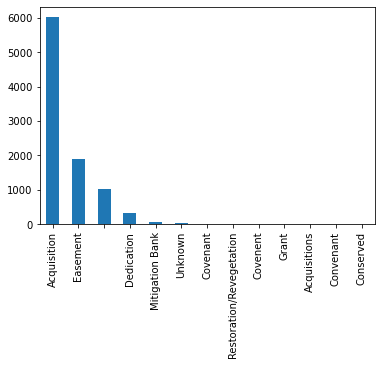

In [12]:
sd['ConsType'].value_counts().plot.bar()

In [76]:
sd.query("ConsType == 'Easement'").sample(5)

,LandID,Jurisdicti,GenOwn,PropertyNa,OwnName,Status,ConsDate,ConsType,PublicAcce,MgtResp,...,MgtPlan,MgtPlanDat,MgtPlanFun,InfoSource,ParcelID,APN8,Acres,Shape_STAr,Shape_STLe,geometry
7127,6950,Carlsbad,Private,AGUA HEDIONDA- SDG&E,SAN DIEGO GAS AND ELECTRIC,Conserved,2003-12-31T00:00:00+00:00,Easement,Yes,PRIVATE,...,YES,1899-11-30T00:00:00+00:00,Yes,Carlsbad HMP,1532749,21101030,180.897186,7.879850e+06,14631.127702,"POLYGON ((6235183.673 1995808.125, 6235325.172..."
2500,2451,San Diego,State,HILLCREST,REGENTS OF UNIVERSITY OF CALIFORNIA,Conserved,1981-02-02T00:00:00+00:00,Easement,,STATE,...,UNKNOWN,1899-11-30T00:00:00+00:00,,,244,44411024,6.400093,2.787869e+05,7204.879452,"MULTIPOLYGON (((6279879.000 1856954.375, 62800..."
7740,7491,Unincorporated,Private,VARIOUS,VARIOUS,Conserved,1997-01-01T00:00:00+00:00,Easement,,LOCAL,...,UNKNOWN,1899-11-30T00:00:00+00:00,,Habitrak 2011,0,57910018,7.565954,3.295716e+05,3828.660102,"POLYGON ((6334462.500 1840624.000, 6334653.000..."
6742,6570,Carlsbad,Home Owners Association,TRAILS OF CALAVERA HILLS HOA,TRAILS OF CALAVERA HILLS HOA,Conserved,1987-06-24T00:00:00+00:00,Easement,No,PRIVATE,...,NO PLAN,1899-11-30T00:00:00+00:00,No,Carlsbad HMP,5039573,16710133,5.436358,2.368068e+05,2702.969095,"POLYGON ((6240263.964 2008499.264, 6240211.000..."
7375,7176,Unincorporated,Private,PRIVATE,PRIVATE,Conserved,2003-01-31T00:00:00+00:00,Easement,No,LOCAL,...,UNKNOWN,1899-11-30T00:00:00+00:00,,Habitrak 2011,633256,40243004,0.702718,3.061026e+04,734.699633,"POLYGON ((6402926.000 1889366.375, 6402930.500..."


In [60]:
eas=['Easement']

In [61]:
sd_eas = (sd[sd['ConsType'].isin(eas)])

In [62]:
sd_eas

,LandID,Jurisdicti,GenOwn,PropertyNa,OwnName,Status,ConsDate,ConsType,PublicAcce,MgtResp,...,MgtPlan,MgtPlanDat,MgtPlanFun,InfoSource,ParcelID,APN8,Acres,Shape_STAr,Shape_STLe,geometry
3,14,Unincorporated,Non-Profit,BAILEY CREEK RANCH,THE NATURE CONSERVANCY,Conserved,1899-11-30T00:00:00+00:00,Easement,No,NON-PROFIT,...,UNKNOWN,1899-11-30T00:00:00+00:00,,TNC shapefile,661902,24718011,2.212382,9.637097e+04,1279.581673,"POLYGON ((6439774.423 1984263.186, 6439768.944..."
10,21,Carlsbad,Private,STANDARDS AREA-SASKA,PRIVATE,Conserved,1998-04-16T00:00:00+00:00,Easement,No,UNKNOWN,...,NO PLAN,1899-11-30T00:00:00+00:00,No,Carlsbad HMP,5039352,21505057,1.098161,4.783569e+04,1099.383106,"POLYGON ((6248828.115 1985032.030, 6248829.317..."
51,62,Unincorporated,Non-Profit,MESA GRANDE EASEMENT,THE NATURE CONSERVANCY,Conserved,1899-11-30T00:00:00+00:00,Easement,No,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,Downloaded from TNC website,661708,19405028,5.213842,2.271140e+05,2327.349634,"POLYGON ((6409414.480 2018987.000, 6409413.978..."
52,63,Unincorporated,Non-Profit,MESA GRANDE EASEMENT,THE NATURE CONSERVANCY,Conserved,1899-11-30T00:00:00+00:00,Easement,No,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,Downloaded from TNC website,661712,19405023,9.394453,4.092208e+05,2559.316212,"POLYGON ((6408758.211 2017017.096, 6408769.776..."
155,166,Unincorporated,Non-Profit,MESA GRANDE EASEMENT,THE NATURE CONSERVANCY,Conserved,1899-11-30T00:00:00+00:00,Easement,No,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,Downloaded from TNC website,661713,19405055,9.760185,4.251520e+05,2608.646169,"POLYGON ((6408769.776 2016387.996, 6408781.995..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,13059,Carlsbad,Private,ENCINAS CREEK PRESERVE,PALOMAR FITNESS PARTNERS LP,Conserved,2008-05-14T00:00:00+00:00,Easement,No,,...,,2006-01-27T00:00:00+00:00,,SDHC 2017 shp- sent to SDMMP,5272028,21204072,4.783653,2.083751e+05,3456.102211,"POLYGON ((6241630.224 1989950.317, 6241563.462..."
9189,13060,Vista,Private,CARLSBAD RACEWAY PRESERVE,FENTON RACEWAY BUSINESS PARK PROPERTY OWNERS ASSN,Conserved,2008-08-07T00:00:00+00:00,Easement,No,,...,,2013-10-30T00:00:00+00:00,,SDHC 2017 shp- sent to SDMMP,5246212,22188014,1.563396,6.810127e+04,1395.813845,"POLYGON ((6257288.492 1994184.871, 6257267.864..."
9190,13061,Vista,Private,CARLSBAD RACEWAY PRESERVE,FENTON RACEWAY BUSINESS PARK PROPERTY OWNERS ASSN,Conserved,2008-08-07T00:00:00+00:00,Easement,No,,...,,2013-10-30T00:00:00+00:00,,SDHC 2017 shp- sent to SDMMP,5246210,22188015,42.578106,1.854695e+06,9189.784489,"POLYGON ((6259202.828 1994176.656, 6259039.989..."
9191,13062,Vista,Private,CARLSBAD RACEWAY PRESERVE,FENTON RACEWAY BUSINESS PARK PROPERTY OWNERS ASSN,Conserved,2008-08-07T00:00:00+00:00,Easement,No,,...,,2013-10-30T00:00:00+00:00,,SDHC 2017 shp- sent to SDMMP,5246203,22188113,4.725505,2.058422e+05,1960.445618,"POLYGON ((6261421.102 1992854.776, 6261146.851..."


An easy way to see if this data is contained in the CCED database is to check the dates. In CCED, the earliest established easements were from San Diego and were from the year 1905.

In [79]:
sd_eas['ConsDate']

3       1899-11-30T00:00:00+00:00
10      1998-04-16T00:00:00+00:00
51      1899-11-30T00:00:00+00:00
52      1899-11-30T00:00:00+00:00
155     1899-11-30T00:00:00+00:00
                  ...            
9188    2008-05-14T00:00:00+00:00
9189    2008-08-07T00:00:00+00:00
9190    2008-08-07T00:00:00+00:00
9191    2008-08-07T00:00:00+00:00
9192    2002-10-04T00:00:00+00:00
Name: ConsDate, Length: 1861, dtype: object

In [80]:
sd_eas = sd_eas.sort_values('ConsDate')

In [82]:
sd_eas.head(10)

,LandID,Jurisdicti,GenOwn,PropertyNa,OwnName,Status,ConsDate,ConsType,PublicAcce,MgtResp,...,MgtPlan,MgtPlanDat,MgtPlanFun,InfoSource,ParcelID,APN8,Acres,Shape_STAr,Shape_STLe,geometry
3,14,Unincorporated,Non-Profit,BAILEY CREEK RANCH,THE NATURE CONSERVANCY,Conserved,1899-11-30T00:00:00+00:00,Easement,No,NON-PROFIT,...,UNKNOWN,1899-11-30T00:00:00+00:00,,TNC shapefile,661902,24718011,2.212382,96370.972656,1279.581673,"POLYGON ((6439774.423 1984263.186, 6439768.944..."
7967,7688,Unincorporated,Private,EATON DEBORAH E,EATON DEBORAH E,Conserved,1899-11-30T00:00:00+00:00,Easement,,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,Habitrak 2011,0,57834212,2.807318,122286.278320,1830.263704,"POLYGON ((6329911.255 1846433.065, 6329908.985..."
7963,7684,Unincorporated,Private,ALPINE ELEVEN LLC,ALPINE ELEVEN L L C,Conserved,1899-11-30T00:00:00+00:00,Easement,,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,Habitrak 2011,5285051,40432058,0.025285,1101.392578,736.821279,"POLYGON ((6391978.856 1880001.847, 6391980.755..."
7962,7684,Unincorporated,Private,ALPINE ELEVEN LLC,ALPINE ELEVEN L L C,Conserved,1899-11-30T00:00:00+00:00,Easement,,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,Habitrak 2011,0,40432058,7.581854,330264.252930,3536.571128,"POLYGON ((6391786.479 1880895.142, 6391782.887..."
6231,6080,San Marcos,City,CITY OF SAN MARCOS,CITY OF SAN MARCOS,Conserved,1899-11-30T00:00:00+00:00,Easement,,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,,0,22176163,1.191122,51885.065430,1489.229646,"POLYGON ((6276751.855 1992259.020, 6276855.465..."
4165,4092,San Marcos,City,CITY OF SAN MARCOS,CITY OF SAN MARCOS,Conserved,1899-11-30T00:00:00+00:00,Easement,,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,,0,22180049,0.512829,22338.742188,1117.468727,"POLYGON ((6278633.245 1991982.845, 6278619.300..."
4166,4093,San Marcos,City,CITY OF SAN MARCOS,CITY OF SAN MARCOS,Conserved,1899-11-30T00:00:00+00:00,Easement,,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,,0,22208064,0.615627,26816.609375,1013.298518,"POLYGON ((6273775.730 1990230.410, 6273775.405..."
6230,6079,San Marcos,City,CITY OF SAN MARCOS,CITY OF SAN MARCOS,Conserved,1899-11-30T00:00:00+00:00,Easement,,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,,0,22175086,0.543701,23683.513672,1119.522033,"POLYGON ((6278940.260 1990850.650, 6278933.465..."
6229,6078,San Diego,City,LOS PENASQUITOS CANYON PRESERVE,CITY OF SAN DIEGO,Conserved,1899-11-30T00:00:00+00:00,Easement,,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,City SD Dedicated Parcels 2013,0,31858010,10.122344,440927.541992,6315.483844,"POLYGON ((6294562.000 1920178.000, 6294557.000..."
6228,6077,San Diego,City,CARMEL VALLEY,CITY OF SAN DIEGO,Conserved,1899-11-30T00:00:00+00:00,Easement,,UNKNOWN,...,UNKNOWN,1899-11-30T00:00:00+00:00,,City SD Dedicated Parcels 2013,0,30427275,5.985339,260720.319336,7115.009454,"POLYGON ((6264959.010 1928816.230, 6264960.935..."


Well, it looks like there are many easements in the SANDAG SanGIS dataset that are from 1899, so clearly they are not contained in CCED. 